In [23]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, pearsonr, spearmanr
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 0 #June 22nd, 2023
current_version = 1 #June 28th, 2023
current_version = 2 #June 28th, 2023
current_version = 3 #October 10th, 2023

stdfont = 14
stdyfrac = 0.06

In [24]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))

In [25]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

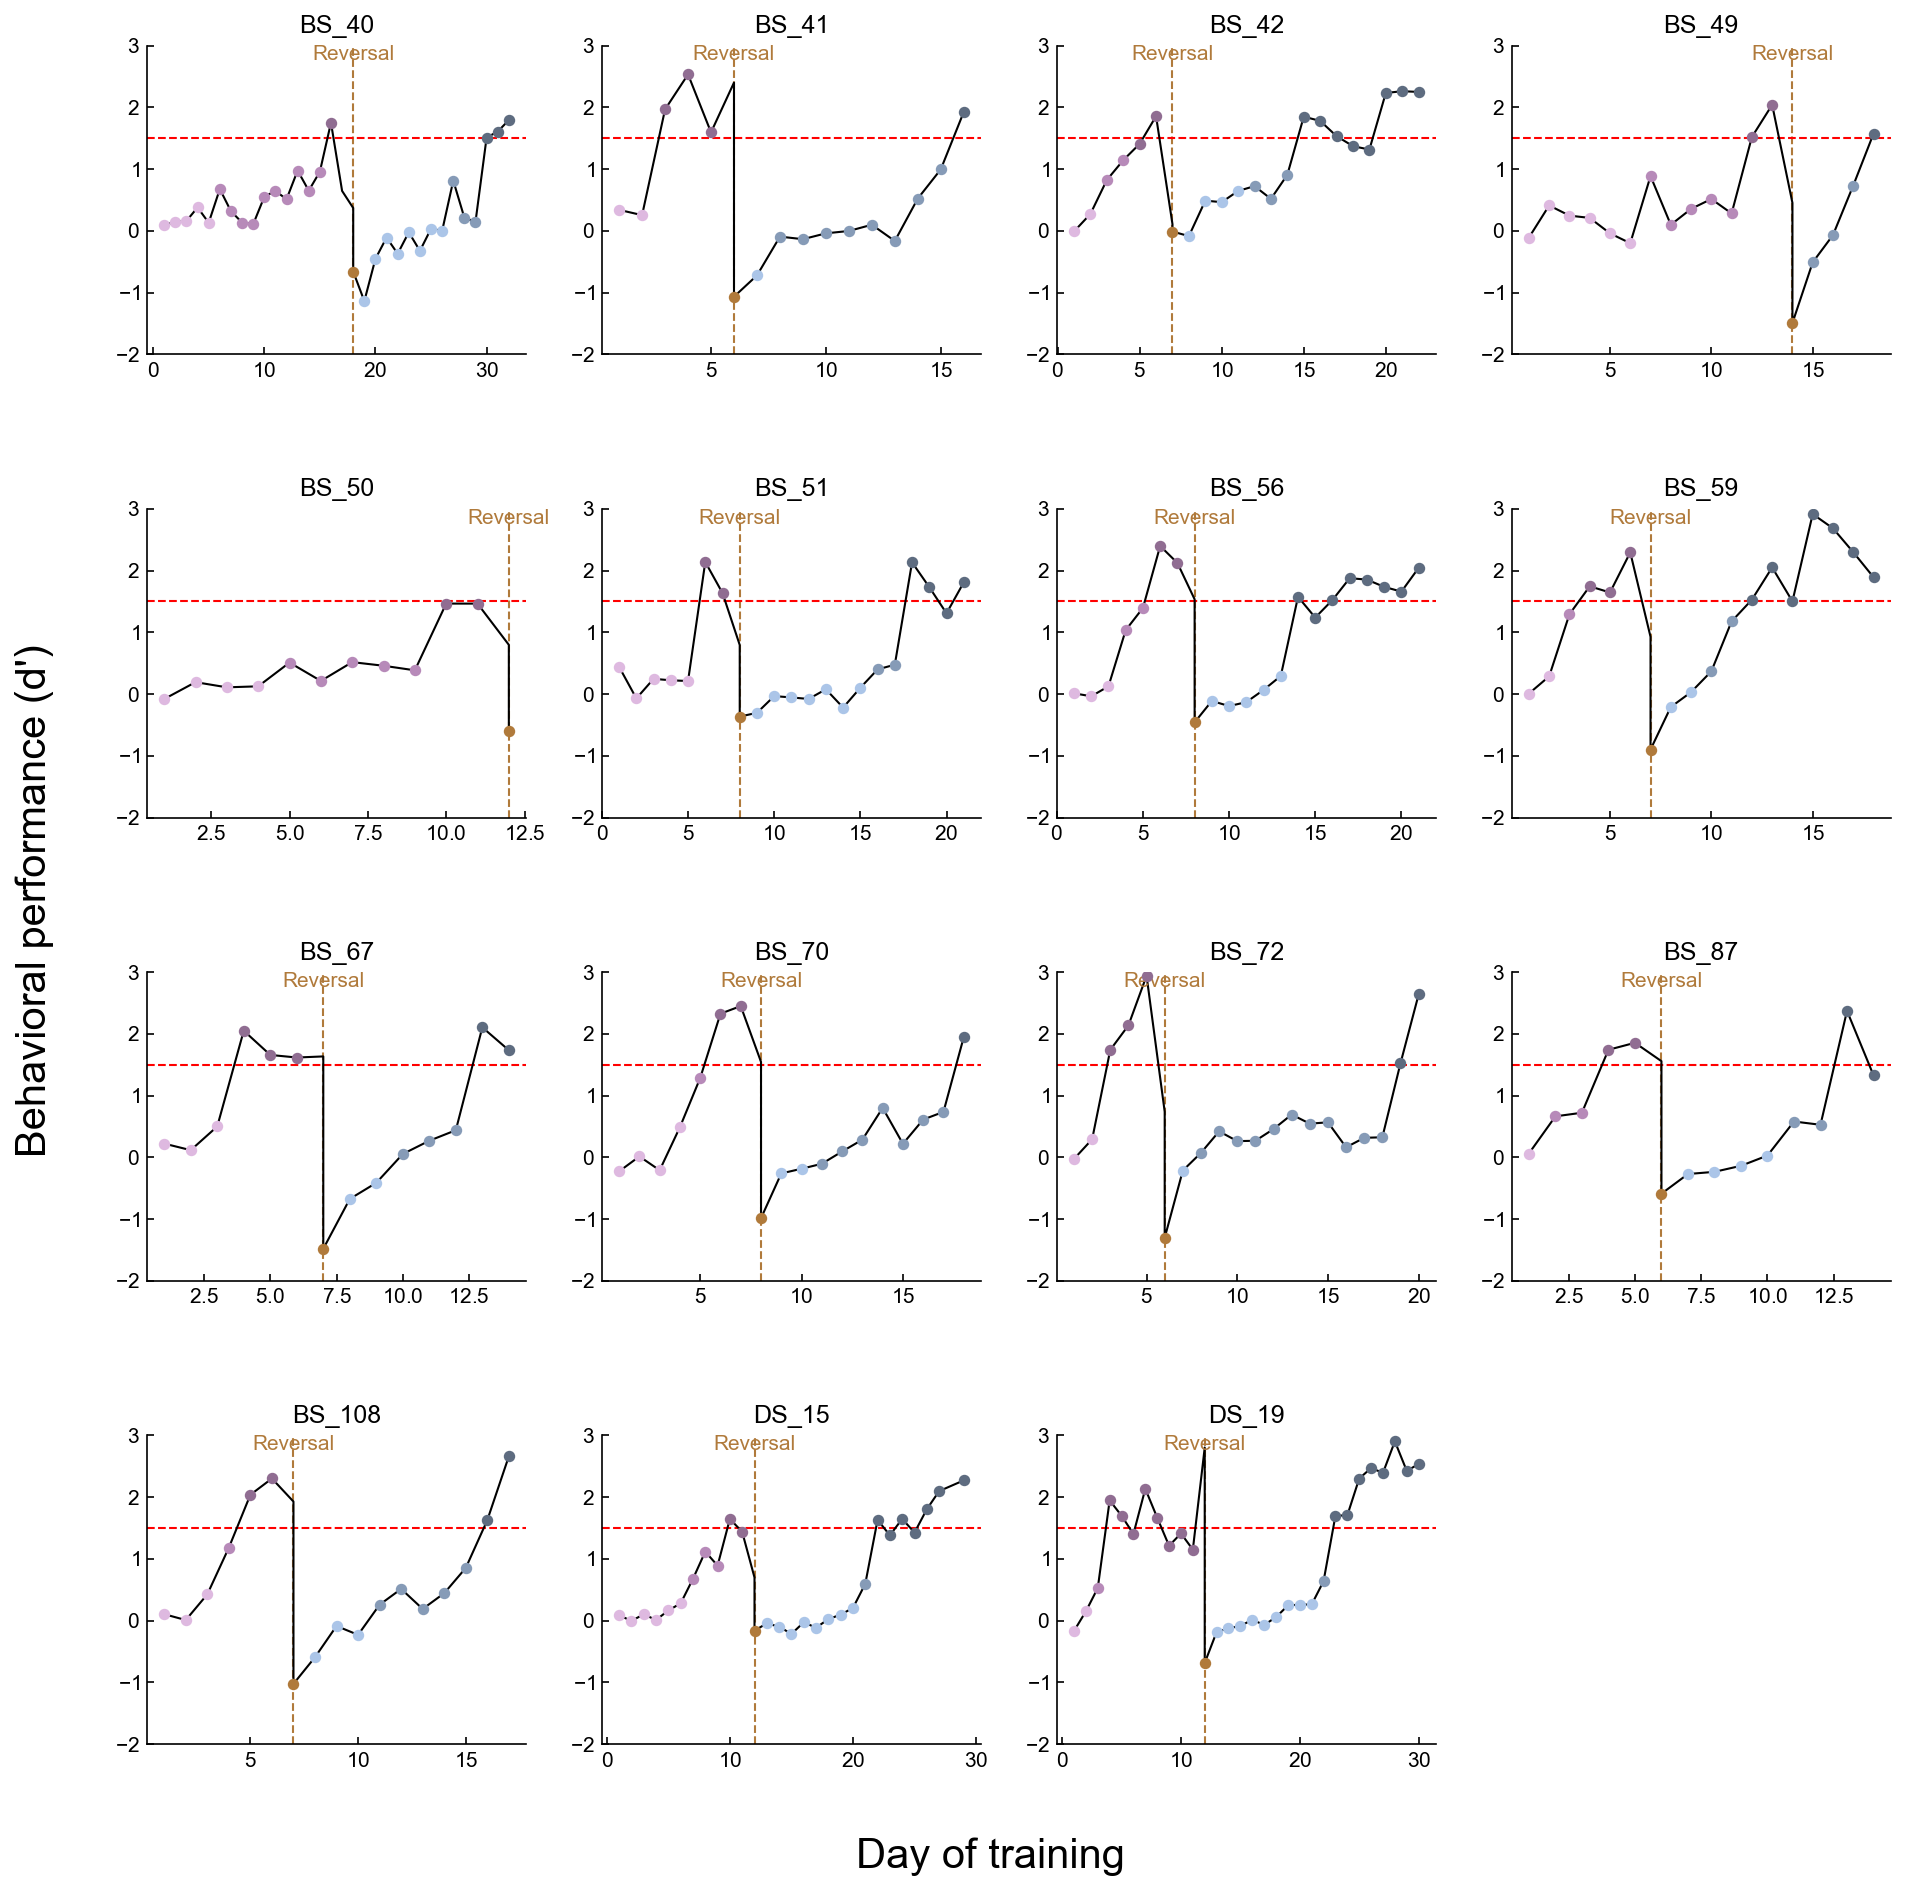

In [26]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [27]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:13<00:00, 55.70it/s] 


In [28]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1829/1829 [00:33<00:00, 55.20it/s] 

errors for: []


In [29]:
Depth_CR_preearly = []
Depth_CR_prelate = []
Depth_CR_preexpert = []
Depth_CR_postearly = []
Depth_CR_postlate = []
Depth_CR_postexpert = []

Depth_NCR_preearly = []
Depth_NCR_prelate = []
Depth_NCR_preexpert = []
Depth_NCR_postearly = []
Depth_NCR_postlate = []
Depth_NCR_postexpert = []

Depth_cCR_preearly = []
Depth_cCR_prelate = []
Depth_cCR_preexpert = []
Depth_cCR_postearly = []
Depth_cCR_postlate = []
Depth_cCR_postexpert = []

Depth_cNCR_preearly = []
Depth_cNCR_prelate = []
Depth_cNCR_preexpert = []
Depth_cNCR_postearly = []
Depth_cNCR_postlate = []
Depth_cNCR_postexpert = []

Depth_preearly = []
Depth_prelate = []
Depth_preexpert = []
Depth_postearly = []
Depth_postlate = []
Depth_postexpert = []

FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

ChoiceMod_preearly = []
ChoiceMod_prelate = []
ChoiceMod_preexpert = []
ChoiceMod_postearly = []
ChoiceMod_postlate = []
ChoiceMod_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
#         if len(sessionfile.responsiveness[clust]['all_trials'].trials) >= 30:
#             FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
#         else:
#             FRmod = np.nan
    except Exception as e:
        FRmod=np.nan
        print(e)
    try:
        ChoiceMod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice
#         if len(sessionfile.responsiveness[clust]['all_trials'].trials) >= 30:
#             ChoiceMod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice
#         else:
#             ChoiceMod = np.nan
    except Exception as e:
        ChoiceMod=np.nan
        print(f"{session}: {e}")
    
    Depth = sessionfile.clusters.depth[clust] - 80
        
    if EILphases[idx] == 'pre early':
        Depth_preearly.append(Depth)
        FRmod_preearly.append(FRmod)
        ChoiceMod_preearly.append(ChoiceMod)
        if FRmod >= 3.5:
            Depth_CR_preearly.append(Depth)
        elif FRmod < 3.5:
            Depth_NCR_preearly.append(Depth)
            
        if ChoiceMod >= 0.8:
            Depth_cCR_preearly.append(Depth)
        elif ChoiceMod < 0.8:
            Depth_cNCR_preearly.append(Depth)
#         Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        Depth_prelate.append(Depth)
        FRmod_prelate.append(FRmod)
        ChoiceMod_prelate.append(ChoiceMod)
        if FRmod >= 3.5:
            Depth_CR_prelate.append(Depth)
        elif FRmod < 3.5:
            Depth_NCR_prelate.append(Depth)
            
        if ChoiceMod >= 0.8:
            Depth_cCR_prelate.append(Depth)
        elif ChoiceMod < 0.8:
            Depth_cNCR_prelate.append(Depth)
#         Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        Depth_preexpert.append(Depth)
        FRmod_preexpert.append(FRmod)
        ChoiceMod_preexpert.append(ChoiceMod)
        if FRmod >= 3.5:
            Depth_CR_preexpert.append(Depth)
        elif FRmod < 3.5:
            Depth_NCR_preexpert.append(Depth)
            
        if ChoiceMod >= 0.8:
            Depth_cCR_preexpert.append(Depth)
        elif ChoiceMod < 0.8:
            Depth_cNCR_preexpert.append(Depth)
#         Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        Depth_postearly.append(Depth)
        FRmod_postearly.append(FRmod)
        ChoiceMod_postearly.append(ChoiceMod)
        if FRmod >= 3.5:
            Depth_CR_postearly.append(Depth)
        elif FRmod < 3.5:
            Depth_NCR_postearly.append(Depth)
            
        if ChoiceMod >= 0.8:
            Depth_cCR_postearly.append(Depth)
        elif ChoiceMod < 0.8:
            Depth_cNCR_postearly.append(Depth)
#         Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        Depth_postlate.append(Depth)
        FRmod_postlate.append(FRmod)
        ChoiceMod_postlate.append(ChoiceMod)
        if FRmod >= 3.5:
            Depth_CR_postlate.append(Depth)
        elif FRmod < 3.5:
            Depth_NCR_postlate.append(Depth)
            
        if ChoiceMod >= 0.8:
            Depth_cCR_postlate.append(Depth)
        elif ChoiceMod < 0.8:
            Depth_cNCR_postlate.append(Depth)
#         Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        Depth_postexpert.append(Depth)
        FRmod_postexpert.append(FRmod)
        ChoiceMod_postexpert.append(ChoiceMod)
        if FRmod >= 3.5:
            Depth_CR_postexpert.append(Depth)
        elif FRmod < 3.5:
            Depth_NCR_postexpert.append(Depth)
            
        if ChoiceMod >= 0.8:
            Depth_cCR_postexpert.append(Depth)
        elif ChoiceMod < 0.8:
            Depth_cNCR_postexpert.append(Depth)
#         Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

Depth_CR_preearly = np.array(Depth_CR_preearly)
Depth_CR_prelate = np.array(Depth_CR_prelate)
Depth_CR_preexpert = np.array(Depth_CR_preexpert)
Depth_CR_postearly = np.array(Depth_CR_postearly)
Depth_CR_postlate = np.array(Depth_CR_postlate)
Depth_CR_postexpert = np.array(Depth_CR_postexpert)

Depth_NCR_preearly = np.array(Depth_NCR_preearly)
Depth_NCR_prelate = np.array(Depth_NCR_prelate)
Depth_NCR_preexpert = np.array(Depth_NCR_preexpert)
Depth_NCR_postearly = np.array(Depth_NCR_postearly)
Depth_NCR_postlate = np.array(Depth_NCR_postlate)
Depth_NCR_postexpert = np.array(Depth_NCR_postexpert)

Depth_cCR_preearly = np.array(Depth_cCR_preearly)
Depth_cCR_prelate = np.array(Depth_cCR_prelate)
Depth_cCR_preexpert = np.array(Depth_cCR_preexpert)
Depth_cCR_postearly = np.array(Depth_cCR_postearly)
Depth_cCR_postlate = np.array(Depth_cCR_postlate)
Depth_cCR_postexpert = np.array(Depth_cCR_postexpert)

Depth_cNCR_preearly = np.array(Depth_cNCR_preearly)
Depth_cNCR_prelate = np.array(Depth_cNCR_prelate)
Depth_cNCR_preexpert = np.array(Depth_cNCR_preexpert)
Depth_cNCR_postearly = np.array(Depth_cNCR_postearly)
Depth_cNCR_postlate = np.array(Depth_cNCR_postlate)
Depth_cNCR_postexpert = np.array(Depth_cNCR_postexpert)

Depth_preearly = np.array(Depth_preearly)
Depth_prelate = np.array(Depth_prelate)
Depth_preexpert = np.array(Depth_preexpert)
Depth_postearly = np.array(Depth_postearly)
Depth_postlate = np.array(Depth_postlate)
Depth_postexpert = np.array(Depth_postexpert)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

ChoiceMod_preearly = np.array(ChoiceMod_preearly)
ChoiceMod_prelate = np.array(ChoiceMod_prelate)
ChoiceMod_preexpert = np.array(ChoiceMod_preexpert)
ChoiceMod_postearly = np.array(ChoiceMod_postearly)
ChoiceMod_postlate = np.array(ChoiceMod_postlate)
ChoiceMod_postexpert = np.array(ChoiceMod_postexpert)

# Ramping_preearly = np.array(Ramping_preearly)
# Ramping_prelate = np.array(Ramping_prelate)
# Ramping_preexpert = np.array(Ramping_preexpert)
# Ramping_postearly = np.array(Ramping_postearly)
# Ramping_postlate = np.array(Ramping_postlate)
# Ramping_postexpert = np.array(Ramping_postexpert)

1390it [00:24, 53.82it/s] 

DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_A

1404it [00:24, 59.20it/s]

DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'
DS_15_15_A

1420it [00:24, 60.34it/s]

DS_15_15_AC.pickle: 'types.SimpleNamespace' object has no attribute 'FRmodulation_choice'


1829it [00:31, 58.01it/s] 


In [30]:
FRmod_list = np.concatenate([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert])
ChoiceMod_list = np.concatenate([ChoiceMod_preearly,ChoiceMod_prelate,ChoiceMod_preexpert,ChoiceMod_postearly,ChoiceMod_postlate,ChoiceMod_postexpert])
Depth_list = np.concatenate([Depth_preearly,Depth_prelate,Depth_preexpert,Depth_postearly,Depth_postlate,Depth_postexpert])/1000

In [31]:
Depth_CR = np.concatenate([Depth_CR_preearly,Depth_CR_prelate,Depth_CR_preexpert,Depth_CR_postearly,Depth_CR_postlate,Depth_CR_postexpert])
Depth_NCR = np.concatenate([Depth_NCR_preearly,Depth_NCR_prelate,Depth_NCR_preexpert,Depth_NCR_postearly,Depth_NCR_postlate,Depth_NCR_postexpert])

Depth_cCR = np.concatenate([Depth_cCR_preearly,Depth_cCR_prelate,Depth_cCR_preexpert,Depth_cCR_postearly,Depth_cCR_postlate,Depth_cCR_postexpert])
Depth_cNCR = np.concatenate([Depth_cNCR_preearly,Depth_cNCR_prelate,Depth_cNCR_preexpert,Depth_cNCR_postearly,Depth_cNCR_postlate,Depth_cNCR_postexpert])

In [32]:
A = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
# B = [Depth_NCR_preearly,Depth_NCR_prelate,Depth_NCR_preexpert,Depth_NCR_postearly,Depth_NCR_postlate,Depth_NCR_postexpert]
for a in A:#,b in zip(A,B):
    print(np.sum(np.isfinite(a)))

148
187
97
306
342
247


In [33]:
148+187+97+306+342+247

1327

In [34]:
len(Depth_CR)

559

In [35]:
len(Depth_NCR)

768

In [36]:
559+768

1327

In [37]:
len(Depth_cCR)

700

In [38]:
len(Depth_cNCR)

600

In [39]:
700+600

1300

In [45]:
np.mean(np.less(ChoiceMod_list,0.01))

0.013206162876008804

In [43]:
[print(l) for l in np.sort(ChoiceMod_list)]

8.458842092382146e-18
2.3069569342860397e-17
4.554761126667309e-17
4.992103529930446e-17
7.401486830834377e-17
8.612639221334548e-17
9.733462133700002e-17
9.800589458760002e-17
1.1842378929335003e-16
1.9255900698105697e-16
4.200252625182858e-16
8.595275029356051e-16
0.007246376811594285
0.007955449482896145
0.008936550491510188
0.00900900900900915
0.009033423667570073
0.009033423667570113
0.015220700152207101
0.01529051987767582
0.016142050040354947
0.016666666666666562
0.01666666666666659
0.01666666666666684
0.0169204737732657
0.01893939393939389
0.018993352326685583
0.019267822736030882
0.020876826722338145
0.022002200220022042
0.02207505518763775
0.022075055187638103
0.02358490566037709
0.023640661938534212
0.02677376171352074
0.02739726027397269
0.028860028860029217
0.03300330033003281
0.03333333333333338
0.03436426116838525
0.03613369467028018
0.03623188405797096
0.03696857670979668
0.037878787878787866
0.039447731755424084
0.039777247414479064
0.039999999999999813
0.0420168067226

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [29]:
ilep.calculateResponsivenessInternal(sessionfile, populationAvgLickResponseInSamples=None)

../..\InsanallyLabEphysTools\responsiveness.py:219: RuntimeWarning: invalid value encountered in double_scalars
  responsiveness[cond].z_score = (FR[maxmodidx] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  responsiveness[cond].z_score_choice = (FR_choice - np.mean(baselineFR)) / np.std(baselineFR)#(FR_choice[maxmodidx_choice] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  responsiveness[cond].z_score = (FR[maxmodidx] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:229: RuntimeWarning: invalid value encountered in double_scalars
  responsiveness[cond].z_score_choice = (FR_choice - np.mean(baselineFR)) / np.std(baselineFR)#(FR_choice[maxmodidx_choice] - np.mean(baselineFR)) / np.std(baselineFR)


{0: {'all_trials': namespace(trials=array([ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
                           46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
                           59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
                           72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
                           85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
                           98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                          111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
                          124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
                          137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
                          150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
                          163, 164, 165, 166, 167, 168, 169, 170, 171, 17

In [25]:
sessionfile.clusters.good

array([  0,   6,   7,  10,  12,  19,  28,  29,  36,  41,  45,  46,  57,
        66,  77,  78,  81,  86,  88,  91, 101, 111, 113, 114, 122, 123,
       128, 134], dtype=int64)

In [23]:
allconds = ilep.getAllConditions(sessionfile,None)

In [20]:
sessionfile = ilep.loadSessionCached(act_directory,'DS_15_15_AC.pickle')

In [21]:
sessionfile.trials.go

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

# Distribution

### Stimulus

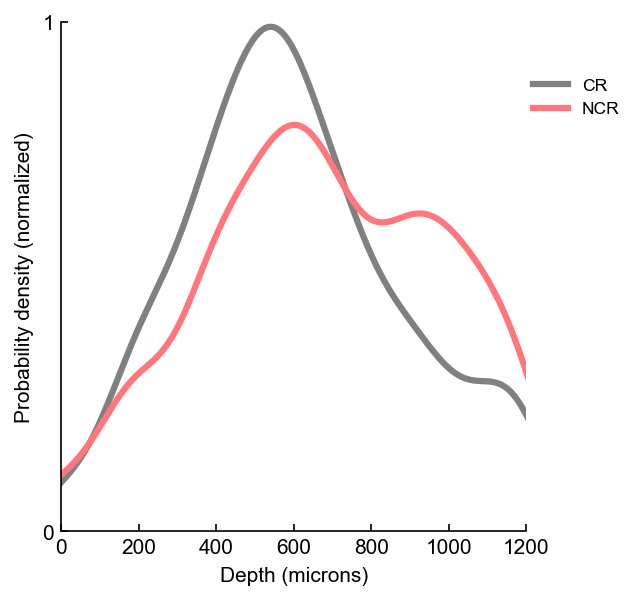

In [81]:
fig, ax = plt.subplots(figsize=(4,4.5))

x_range = np.linspace(0,1500,1000)

KDE = gaussian_kde(ilep.rmnan(Depth_CR), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
ymax_CR = np.max(KDE_eval)
ax.plot(x_range,KDE_eval,color=CR_COLOR,label='CR',lw=3)

KDE = gaussian_kde(ilep.rmnan(Depth_NCR), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
ymax_NCR = np.max(KDE_eval)
ax.plot(x_range,KDE_eval,color=NCR_COLOR,label='NCR',lw=3)

ax.set_xlim([0,1200])
ax.set_xticks([0,200,400,600,800,1000,1200])
ax.set_xticklabels([str(s) for s in [0,200,400,600,800,1000,1200]])
ax.set_xlabel('Depth (microns)')

ax.set_ylim([0,max(ymax_NCR,ymax_CR)*1.01])
ax.set_yticks(ax.get_ylim())
ax.set_yticklabels([0,1])
ax.set_ylabel('Probability density (normalized)')

lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','CR NCR Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [82]:
mannwhitneyu(Depth_CR,Depth_NCR)

MannwhitneyuResult(statistic=182256.0, pvalue=2.5941993450705897e-06)

In [83]:
len(Depth_CR)

559

In [84]:
len(Depth_NCR)

768

### Choice

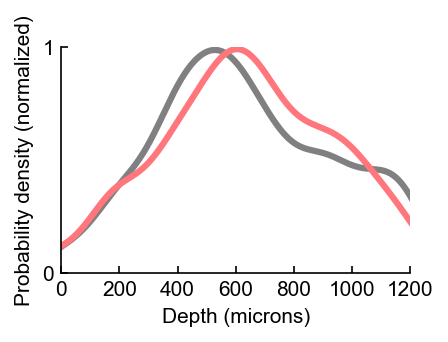

In [22]:
# fig, ax = plt.subplots(figsize=(3,4.5))
fig, ax = plt.subplots(figsize=(3,2))

x_range = np.linspace(0,1500,1000)

KDE = gaussian_kde(ilep.rmnan(Depth_cCR), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
ymax_CR = np.max(KDE_eval)
ax.plot(x_range,KDE_eval,color=CR_COLOR,label='CR',lw=3)

KDE = gaussian_kde(ilep.rmnan(Depth_cNCR), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
ymax_NCR = np.max(KDE_eval)
ax.plot(x_range,KDE_eval,color=NCR_COLOR,label='NCR',lw=3)

ax.set_xlim([0,1200])
ax.set_xticks([0,200,400,600,800,1000,1200])
ax.set_xticklabels([str(s) for s in [0,200,400,600,800,1000,1200]])
ax.set_xlabel('Depth (microns)')

ax.set_ylim([0,max(ymax_NCR,ymax_CR)*1.01])
ax.set_yticks(ax.get_ylim())
ax.set_yticklabels([0,1])
ax.set_ylabel('Probability density (normalized)')

# lgd = ax.legend(frameon=False,loc=(1,.8))

artists = []
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','CR NCR Choice Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=artists, bbox_inches='tight')

In [86]:
mannwhitneyu(Depth_cCR,Depth_cNCR)

MannwhitneyuResult(statistic=205370.0, pvalue=0.49266784384961937)

In [87]:
len(Depth_cCR)

700

In [88]:
len(Depth_cNCR)

600

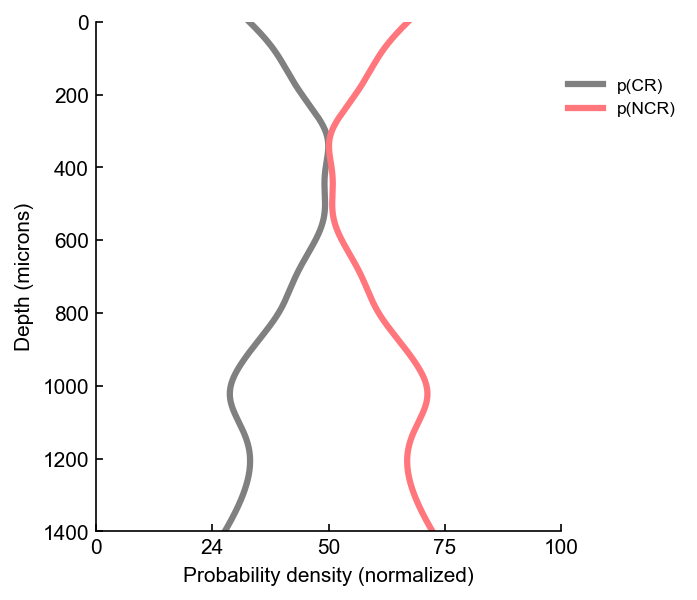

In [138]:
fig, ax = plt.subplots(figsize=(4,4.5))

y_range = np.linspace(0,1400,1000)

KDE_CR = gaussian_kde(ilep.rmnan(Depth_CR), bw_method='scott')
KDE_eval_CR = KDE_CR.evaluate(x_range)
KDE_eval_CR = KDE_eval_CR * len(Depth_CR)

KDE_NCR = gaussian_kde(ilep.rmnan(Depth_NCR), bw_method='scott')
KDE_eval_NCR = KDE_NCR.evaluate(x_range)
KDE_eval_NCR = KDE_eval_NCR * len(Depth_NCR)

pct_CR = KDE_eval_CR / (KDE_eval_CR+KDE_eval_NCR)
pct_NCR = KDE_eval_NCR / (KDE_eval_CR+KDE_eval_NCR)

ax.plot(pct_CR,y_range,color=CR_COLOR,label='p(CR)',lw=3)
ax.plot(pct_NCR,y_range,color=NCR_COLOR,label='p(NCR)',lw=3)

ax.set_xlim([0,1])
ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_xticklabels([0,24,50,75,100])
ax.set_xlabel('Probability density (normalized)')

ax.set_ylim([1400,0])
ax.set_yticks([0,200,400,600,800,1000,1200,1400])
ax.set_yticklabels([str(s) for s in [0,200,400,600,800,1000,1200,1400]])
ax.set_ylabel('Depth (microns)')

lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','CR NCR Laminar probability distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

## Cloud V1

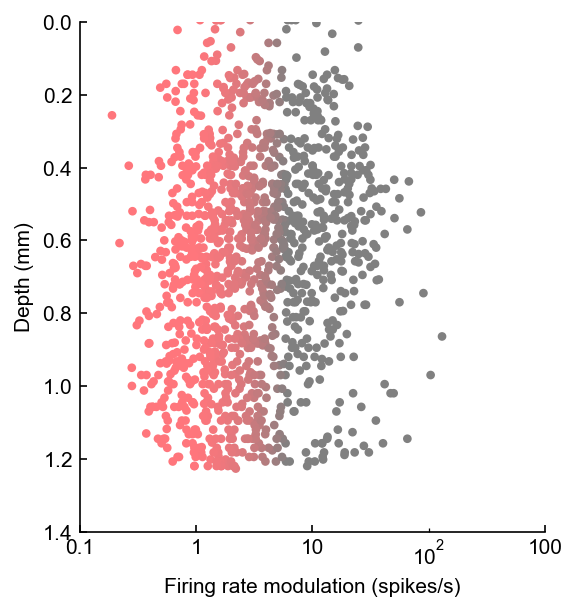

In [11]:
fig, ax = plt.subplots(figsize=(4,4.5))

colors = NCR_CR_cmap((FRmod_list-1)/5)
# colors = NCR_CR_cmap((FRmod_list-0.1)/2)
ax.scatter(FRmod_list,Depth_list,c=colors,s=10)

ax.set_xscale('log',subs=[])
ax.set_xlim([0.1,1000])
ax.set_xticks([0.1,1,10,1000])
ax.set_xticklabels([str(d) for d in [0.1,1,10,100]])
ax.set_xlabel('Firing rate modulation (spikes/s)')

ax.set_ylim([1.4,0])
ax.set_ylabel('Depth (mm)')

# ax.set_ylim([0,max(ymax_NCR,ymax_CR)*1.01])
# ax.set_yticks(ax.get_ylim())
# ax.set_yticklabels([0,1])
# ax.set_ylabel('Probability density (normalized)')

#lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','FRmod Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## Cloud V2

### Stimulus

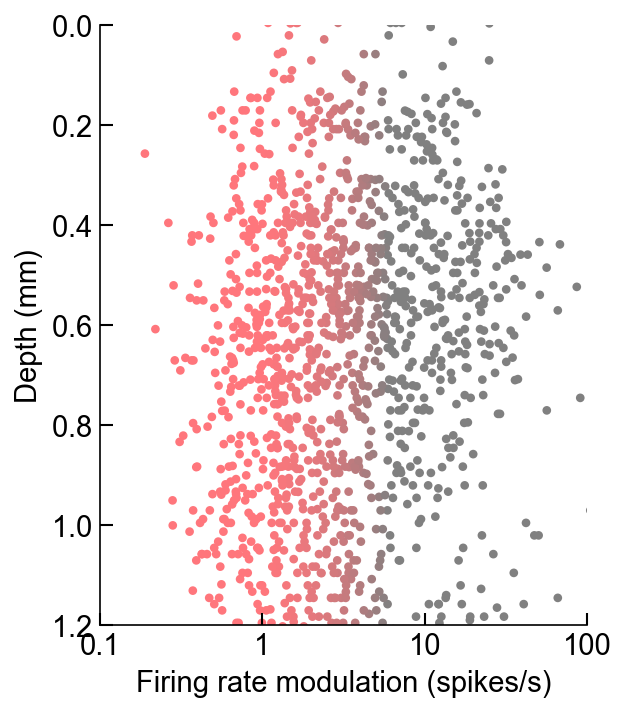

In [80]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

colors = NCR_CR_cmap((FRmod_list-1)/5)
ax.scatter(FRmod_list,Depth_list,c=colors,s=10)

################################################################################################################
ax.set_xscale('log',subs=[])
ax.set_xlim([0.1,100])
ax.set_xticks([0.1,1,10,100])
ax.set_xticklabels([str(d) for d in [0.1,1,10,100]])
xlab = ax.set_xlabel('Firing rate modulation (spikes/s)')

ax.set_ylim([1.2,0])
ylab = ax.set_ylabel('Depth (mm)')

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','FRmod Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [75]:
X,Y = ilep.paired_rmnan(FRmod_list,Depth_list)
r,p = spearmanr(X,Y)
print(f"r = {r}, p = {p}")

r = -0.150802228604338, p = 3.393022992984525e-08


In [76]:
len(X)

1327

In [77]:
len(Y)

1327

### Choice

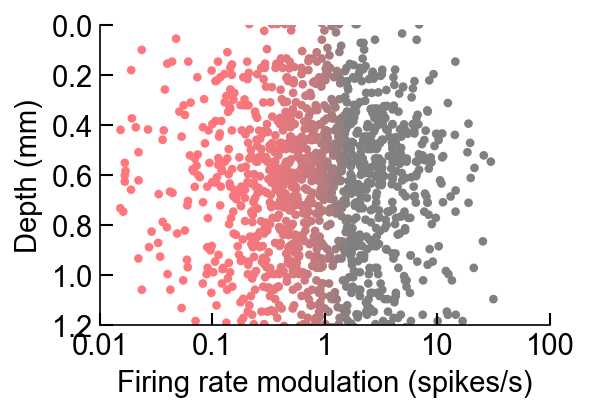

In [46]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

# fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
fig,ax = make_axis_size(3, 2, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

# colors = NCR_CR_cmap((ChoiceMod_list-1)/5)
colors = NCR_CR_cmap((ChoiceMod_list-0.1)/1.5)
ax.scatter(ChoiceMod_list,Depth_list,c=colors,s=10)

################################################################################################################
ax.set_xscale('log',subs=[])
ax.set_xlim([0.01,100])
ax.set_xticks([0.01,0.1,1,10,100])
ax.set_xticklabels([str(d) for d in [0.01,0.1,1,10,100]])
xlab = ax.set_xlabel('Firing rate modulation (spikes/s)')

ax.set_ylim([1.2,0])
ylab = ax.set_ylabel('Depth (mm)')

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','ChoiceMod Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [90]:
X,Y = ilep.paired_rmnan(ChoiceMod_list,Depth_list)
r,p = spearmanr(X,Y)
print(f"r = {r}, p = {p}")

r = -0.012436514721303098, p = 0.6541597713496788


In [91]:
len(X)

1300

In [92]:
len(Y)

1300

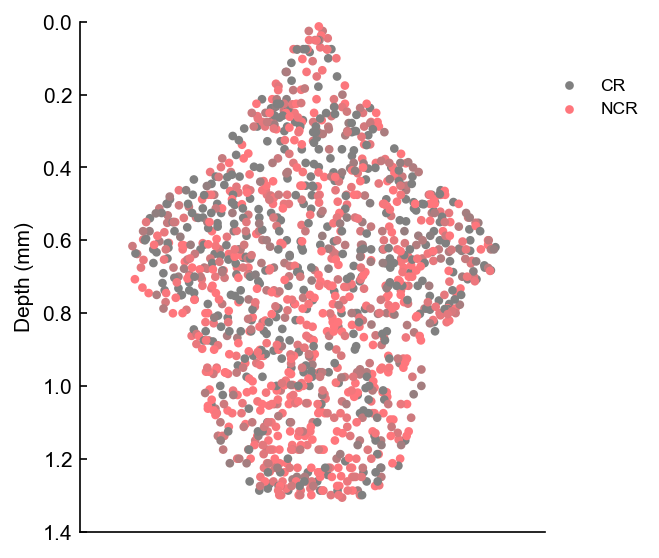

In [112]:
fig, ax = plt.subplots(figsize=(4,4.5))

X,Y = ilep.violin(Depth_list)
colors = NCR_CR_cmap((FRmod_list-1)/5)
ax.scatter(X,Y,c=colors,s=10)

ax.set_xlim([-0.5,0.5])
ax.set_xticks([])
#ax.set_xlabel('Firing rate modulation (spikes/s)')

ax.set_ylim([1.4,0])
ax.set_ylabel('Depth (mm)')

ax.scatter([],[],c=CR_COLOR,s=10,label='CR')
ax.scatter([],[],c=NCR_COLOR,s=10,label='NCR')
lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','FRmod Laminar distribution pointcloud V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Ramping

In [28]:
Depth_Ramp_preearly = []
Depth_Ramp_prelate = []
Depth_Ramp_preexpert = []
Depth_Ramp_postearly = []
Depth_Ramp_postlate = []
Depth_Ramp_postexpert = []

Depth_Nonramp_preearly = []
Depth_Nonramp_prelate = []
Depth_Nonramp_preexpert = []
Depth_Nonramp_postearly = []
Depth_Nonramp_postlate = []
Depth_Nonramp_postexpert = []

Depth_preearly = []
Depth_prelate = []
Depth_preexpert = []
Depth_postearly = []
Depth_postlate = []
Depth_postexpert = []

Ramp_preearly = []
Ramp_prelate = []
Ramp_preexpert = []
Ramp_postearly = []
Ramp_postlate = []
Ramp_postexpert = []

# Ramping_preearly = []
# Ramping_prelate = []
# Ramping_preexpert = []
# Ramping_postearly = []
# Ramping_postlate = []
# Ramping_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    RampNorm = sessionfile.responsiveness[clust]['go'].rampingModNorm
    Ramp = sessionfile.responsiveness[clust]['go'].rampingMod
    Depth = sessionfile.clusters.depth[clust]
    
    if Ramp < 0:
        continue
        
    if EILphases[idx] == 'pre early':
        Depth_preearly.append(Depth)
        Ramp_preearly.append(Ramp)
        if RampNorm >= 0.5:
            Depth_Ramp_preearly.append(Depth)
        else:
            Depth_Nonramp_preearly.append(Depth)
#         Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        Depth_prelate.append(Depth)
        Ramp_prelate.append(Ramp)
        if RampNorm >= 0.5:
            Depth_Ramp_prelate.append(Depth)
        else:
            Depth_Nonramp_prelate.append(Depth)
#         Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        Depth_preexpert.append(Depth)
        Ramp_preexpert.append(Ramp)
        if RampNorm >= 0.5:
            Depth_Ramp_preexpert.append(Depth)
        else:
            Depth_Nonramp_preexpert.append(Depth)
#         Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        Depth_postearly.append(Depth)
        Ramp_postearly.append(Ramp)
        if RampNorm >= 0.5:
            Depth_Ramp_postearly.append(Depth)
        else:
            Depth_Nonramp_postearly.append(Depth)
#         Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        Depth_postlate.append(Depth)
        Ramp_postlate.append(Ramp)
        if RampNorm >= 0.5:
            Depth_Ramp_postlate.append(Depth)
        else:
            Depth_Nonramp_postlate.append(Depth)
#         Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        Depth_postexpert.append(Depth)
        Ramp_postexpert.append(Ramp)
        if RampNorm >= 0.5:
            Depth_Ramp_postexpert.append(Depth)
        else:
            Depth_Nonramp_postexpert.append(Depth)
#         Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

Depth_Ramp_preearly = np.array(Depth_Ramp_preearly)
Depth_Ramp_prelate = np.array(Depth_Ramp_prelate)
Depth_Ramp_preexpert = np.array(Depth_Ramp_preexpert)
Depth_Ramp_postearly = np.array(Depth_Ramp_postearly)
Depth_Ramp_postlate = np.array(Depth_Ramp_postlate)
Depth_Ramp_postexpert = np.array(Depth_Ramp_postexpert)

Depth_Nonramp_preearly = np.array(Depth_Nonramp_preearly)
Depth_Nonramp_prelate = np.array(Depth_Nonramp_prelate)
Depth_Nonramp_preexpert = np.array(Depth_Nonramp_preexpert)
Depth_Nonramp_postearly = np.array(Depth_Nonramp_postearly)
Depth_Nonramp_postlate = np.array(Depth_Nonramp_postlate)
Depth_Nonramp_postexpert = np.array(Depth_Nonramp_postexpert)

Depth_preearly = np.array(Depth_preearly)
Depth_prelate = np.array(Depth_prelate)
Depth_preexpert = np.array(Depth_preexpert)
Depth_postearly = np.array(Depth_postearly)
Depth_postlate = np.array(Depth_postlate)
Depth_postexpert = np.array(Depth_postexpert)

Ramp_preearly = np.array(Ramp_preearly)
Ramp_prelate = np.array(Ramp_prelate)
Ramp_preexpert = np.array(Ramp_preexpert)
Ramp_postearly = np.array(Ramp_postearly)
Ramp_postlate = np.array(Ramp_postlate)
Ramp_postexpert = np.array(Ramp_postexpert)

# Ramping_preearly = np.array(Ramping_preearly)
# Ramping_prelate = np.array(Ramping_prelate)
# Ramping_preexpert = np.array(Ramping_preexpert)
# Ramping_postearly = np.array(Ramping_postearly)
# Ramping_postlate = np.array(Ramping_postlate)
# Ramping_postexpert = np.array(Ramping_postexpert)

1830it [00:29, 62.67it/s] 


In [98]:
Depth_Ramp = np.concatenate([Depth_Ramp_preearly,Depth_Ramp_prelate,Depth_Ramp_preexpert,Depth_Ramp_postearly,Depth_Ramp_postlate,Depth_Ramp_postexpert])
Depth_Nonramp = np.concatenate([Depth_Nonramp_preearly,Depth_Nonramp_prelate,Depth_Nonramp_preexpert,Depth_Nonramp_postearly,Depth_Nonramp_postlate,Depth_Nonramp_postexpert])

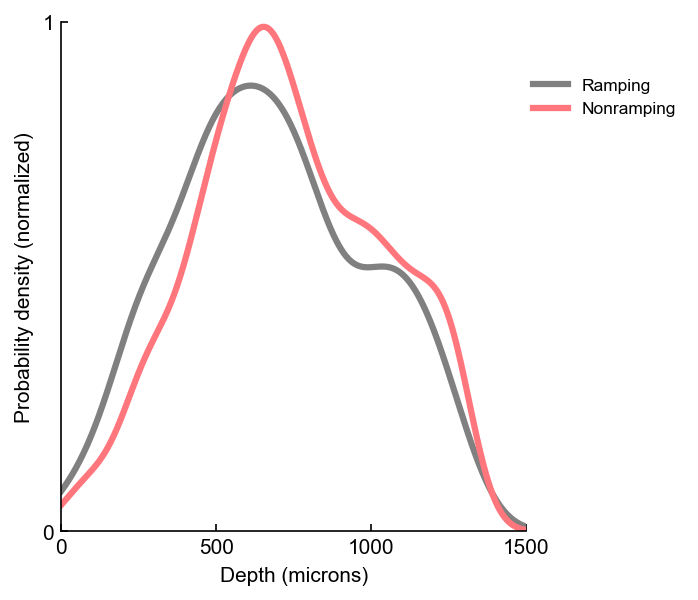

In [99]:
fig, ax = plt.subplots(figsize=(4,4.5))

x_range = np.linspace(0,1500,1000)

KDE = gaussian_kde(ilep.rmnan(Depth_Ramp), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
ymax_CR = np.max(KDE_eval)
ax.plot(x_range,KDE_eval,color=CR_COLOR,label='Ramping',lw=3)

KDE = gaussian_kde(ilep.rmnan(Depth_Nonramp), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
ymax_NCR = np.max(KDE_eval)
ax.plot(x_range,KDE_eval,color=NCR_COLOR,label='Nonramping',lw=3)

ax.set_xlim([0,1400])
ax.set_xticks([0,200,400,600,800,1000,1200,1400])
ax.set_xticklabels([str(s) for s in [0,200,400,600,800,1000,1200,1400]])
ax.set_xlabel('Depth (microns)')

ax.set_ylim([0,max(ymax_NCR,ymax_CR)*1.01])
ax.set_yticks(ax.get_ylim())
ax.set_yticklabels([0,1])
ax.set_ylabel('Probability density (normalized)')

lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Ramping Nonramping Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [100]:
mannwhitneyu(Depth_Ramp,Depth_Nonramp)

MannwhitneyuResult(statistic=136852.5, pvalue=0.008044259853817569)

In [33]:
Ramp_list = np.abs(np.concatenate([Ramp_preearly,Ramp_prelate,Ramp_preexpert,Ramp_postearly,Ramp_postlate,Ramp_postexpert]))
Depth_list = np.concatenate([Depth_preearly,Depth_prelate,Depth_preexpert,Depth_postearly,Depth_postlate,Depth_postexpert])/1000

#Ramp_list = np.abs(Ramp_list)

## V1

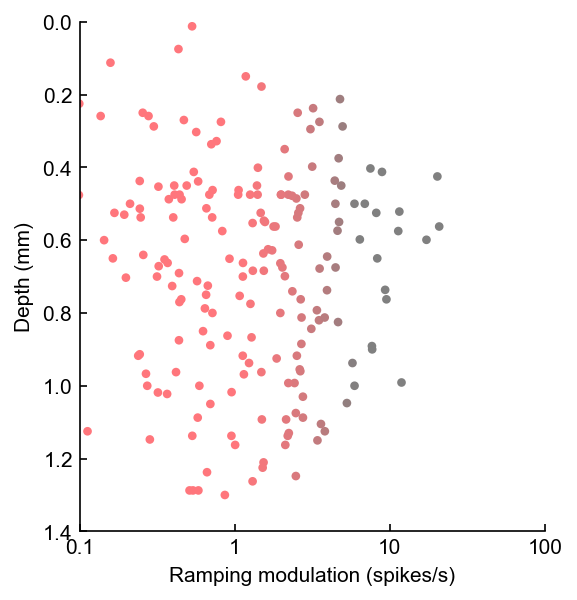

In [30]:
fig, ax = plt.subplots(figsize=(4,4.5))

colors = NCR_CR_cmap((Ramp_list-1)/5)
ax.scatter(Ramp_list,Depth_list,c=colors,s=10)

ax.set_xscale('log',subs=[])
ax.set_xlim([0.1,100])
ax.set_xticks([0.1,1,10,100])
ax.set_xticklabels([str(d) for d in [0.1,1,10,100]])
ax.set_xlabel('Ramping modulation (spikes/s)')

ax.set_ylim([1.4,0])
ax.set_ylabel('Depth (mm)')

# ax.set_ylim([0,max(ymax_NCR,ymax_CR)*1.01])
# ax.set_yticks(ax.get_ylim())
# ax.set_yticklabels([0,1])
# ax.set_ylabel('Probability density (normalized)')

#lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Ramping Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

## V2

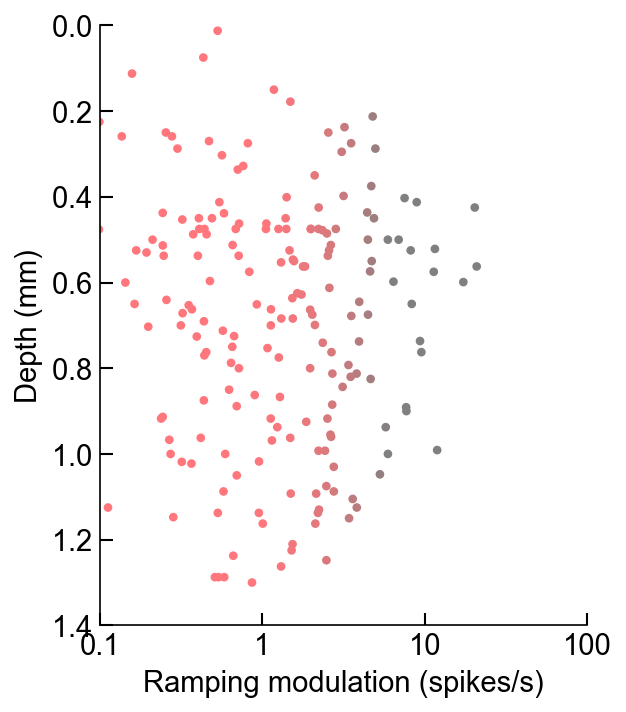

In [35]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

colors = NCR_CR_cmap((Ramp_list-1)/5)
ax.scatter(Ramp_list,Depth_list,c=colors,s=10)

################################################################################################################
ax.set_xscale('log',subs=[])
ax.set_xlim([0.1,100])
ax.set_xticks([0.1,1,10,100])
ax.set_xticklabels([str(d) for d in [0.1,1,10,100]])
xlab = ax.set_xlabel('Ramping modulation (spikes/s)')

ax.set_ylim([1.4,0])
ylab = ax.set_ylabel('Depth (mm)')

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
# for item in (ax.get_xticklabels()):
#     item.set_fontsize(stdfont*0.9)
#     pass

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Ramping Laminar distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

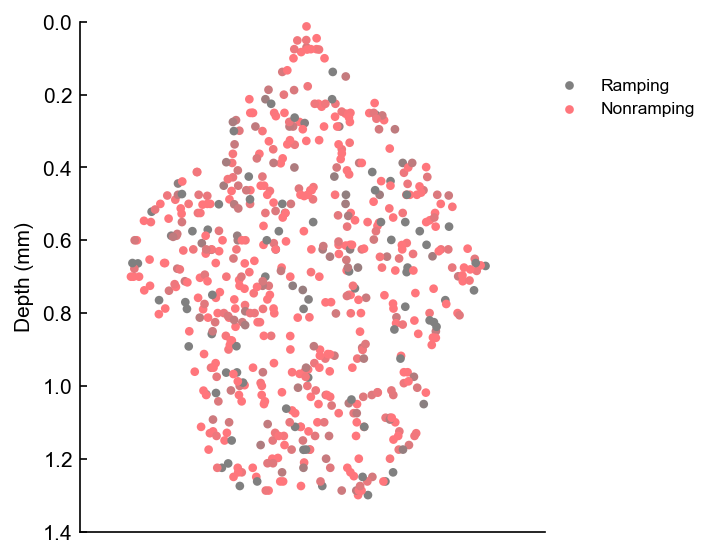

In [118]:
fig, ax = plt.subplots(figsize=(4,4.5))

X,Y = ilep.violin(Depth_list)
colors = NCR_CR_cmap((Ramp_list-1)/5)
ax.scatter(X,Y,c=colors,s=10)

ax.set_xlim([-0.5,0.5])
ax.set_xticks([])
#ax.set_xlabel('Firing rate modulation (spikes/s)')

ax.set_ylim([1.4,0])
ax.set_ylabel('Depth (mm)')

ax.scatter([],[],c=CR_COLOR,s=10,label='Ramping')
ax.scatter([],[],c=NCR_COLOR,s=10,label='Nonramping')
lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Ramping Laminar distribution pointcloud V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [98]:
Depth_Ramp = np.concatenate([Depth_Ramp_preearly,Depth_Ramp_prelate,Depth_Ramp_preexpert,Depth_Ramp_postearly,Depth_Ramp_postlate,Depth_Ramp_postexpert])
Depth_Nonramp = np.concatenate([Depth_Nonramp_preearly,Depth_Nonramp_prelate,Depth_Nonramp_preexpert,Depth_Nonramp_postearly,Depth_Nonramp_postlate,Depth_Nonramp_postexpert])

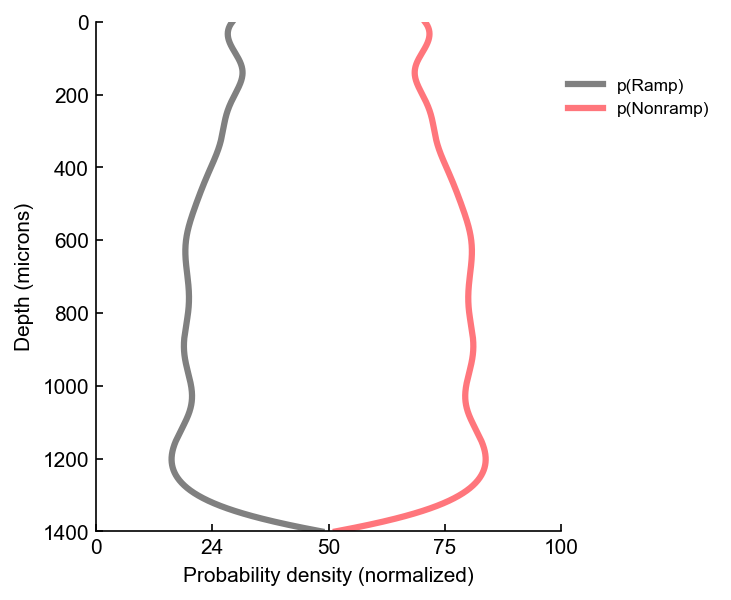

In [137]:
fig, ax = plt.subplots(figsize=(4,4.5))

y_range = np.linspace(0,1400,1000)

KDE_Ramp = gaussian_kde(ilep.rmnan(Depth_Ramp), bw_method='scott')
KDE_eval_Ramp = KDE_Ramp.evaluate(x_range)
KDE_eval_Ramp = KDE_eval_Ramp * len(Depth_Ramp)

KDE_Nonramp = gaussian_kde(ilep.rmnan(Depth_Nonramp), bw_method='scott')
KDE_eval_Nonramp = KDE_Nonramp.evaluate(x_range)
KDE_eval_Nonramp = KDE_eval_Nonramp * len(Depth_Nonramp)

pct_Ramp = KDE_eval_Ramp / (KDE_eval_Ramp+KDE_eval_Nonramp)
pct_Nonramp = KDE_eval_Nonramp / (KDE_eval_Ramp+KDE_eval_Nonramp)

ax.plot(pct_Ramp,y_range,color=CR_COLOR,label='p(Ramp)',lw=3)
ax.plot(pct_Nonramp,y_range,color=NCR_COLOR,label='p(Nonramp)',lw=3)

ax.set_xlim([0,1])
ax.set_xticks([0,0.25,0.5,0.75,1])
ax.set_xticklabels([0,24,50,75,100])
ax.set_xlabel('Probability density (normalized)')

ax.set_ylim([1400,0])
ax.set_yticks([0,200,400,600,800,1000,1200,1400])
ax.set_yticklabels([str(s) for s in [0,200,400,600,800,1000,1200,1400]])
ax.set_ylabel('Depth (microns)')

lgd = ax.legend(frameon=False,loc=(1,.8))

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Ramping Nonramping Laminar probability distribution V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')